<a href="https://colab.research.google.com/github/edugaitann81/Mercado_libre_prueba/blob/main/Tarea_2_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREA 2: Métodos de aprendizaje No Supervisado.

- 1 Utilice `t-SNE` para reducir las `primeras 5000 imágenes` del conjunto de datos `MNIST` (mismo de la tarea anterior) a 2 dimensiones.

  * 1.1. grafique el resultado. Puede utilizar un diagrama de dispersión con `10 colores diferentes` para representar la clase de destino de cada imagen. Alternativamente, puede reemplazar cada punto en el diagrama de dispersión con la clase de instancia correspondiente (un dígito de 0 a 9).

  * 1.2, Intente utilizar otro algoritmo de reducción de dimensionalidad, como `PCA`, y compare las visualizaciones resultantes.

  `NOTA:` Puede guiarse del `ejercicio aplicativo` desarrollado en el `capítulo 6`, sección `tópicos especiales`.

In [ ]:
# Utilizo el codigo anterior de la tarea_1, pero con el filtro a las primeras 5.000 Imagenes
# Punto 1

%%time
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target

# Selecciono las primeras 5000 imágenes
X_subset = X[:5000]
y_subset = y[:5000]

# Importar TSNE
from sklearn.manifold import TSNE

# TSNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X_subset)

# Nuevo DataFrame Dimensión 1 y 2
df_tsne = pd.DataFrame(X_reduced, columns=["Dim1", "Dim2"])
df_tsne["Etiqueta"] = y_subset

CPU times: user 1min 46s, sys: 1.29 s, total: 1min 47s
Wall time: 1min 16s


In [ ]:
# Nuevo DataFrame
df_tsne

,Dim1,Dim2,Etiqueta
0,17.119280,9.264529,5
1,59.890213,24.378284,0
2,13.954527,-53.092625,4
3,-62.270920,12.535522,1
4,-3.569463,-26.380114,9
...,...,...,...
4995,-55.400513,-26.203156,7
4996,6.809088,49.053181,3
4997,-29.433853,48.029285,2
4998,-35.706398,7.542879,1


**Desarrollo del punto 1.1** grafique el resultado. Puede utilizar un diagrama de dispersión con 10 colores diferentes para representar la clase de destino de cada imagen. Alternativamente, puede reemplazar cada punto en el diagrama de dispersión con la clase de instancia correspondiente (un dígito de 0 a 9).

Text(0, 0.5, 'Dim2')

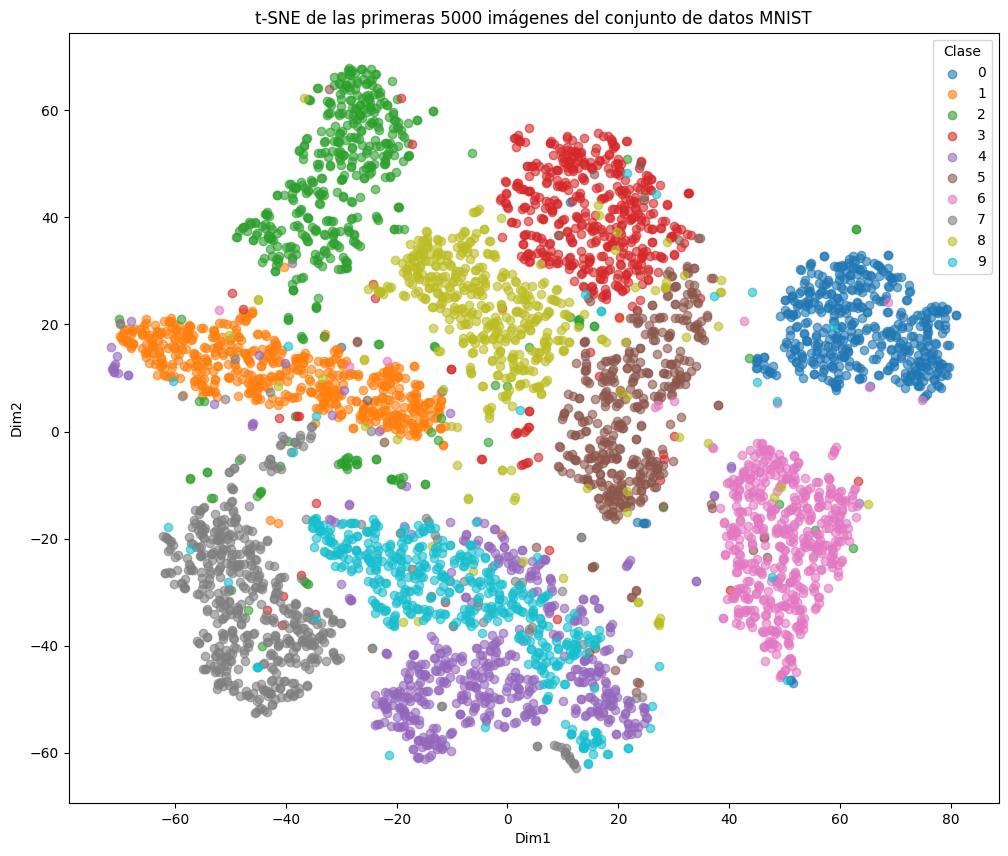

In [ ]:
# Visualización de resultados con clase (2 dimensiones)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
for i in range(10):
    plt.scatter(df_tsne.loc[df_tsne['Etiqueta'] == str(i), 'Dim1'],
                df_tsne.loc[df_tsne['Etiqueta'] == str(i), 'Dim2'],
                label=str(i), alpha=0.6)

plt.legend(title="Clase")
plt.title("t-SNE de las primeras 5000 imágenes del conjunto de datos MNIST")
plt.xlabel("Dim1")
plt.ylabel("Dim2")

**Desarrollo punto 1.2** Intente utilizar otro algoritmo de reducción de dimensionalidad, como PCA, y compare las visualizaciones resultantes.

In [ ]:
# Importo PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced_pca = pca.fit_transform(X_subset)

# DataFrame resultados PCA
df_pca = pd.DataFrame(X_reduced_pca, columns=["Dim1", "Dim2"])
df_pca["Etiqueta"] = y_subset
df_pca

,Dim1,Dim2,Etiqueta
0,116.153128,368.752376,5
1,1037.281312,386.520485,0
2,-28.451572,-453.371146,4
3,-877.067680,596.109136,1
4,-357.771901,-687.214029,9
...,...,...,...
4995,-370.185282,-648.680070,7
4996,357.878751,949.029904,3
4997,474.481341,181.285138,2
4998,-850.334053,255.454176,1


In [ ]:
# Varianza explicada
explained_variance = pca.explained_variance_ratio_

# Captura de varianza
print(f"Varianza explicada por el primer componente principal: {explained_variance[0]:.2%}")
print(f"Varianza explicada por el segundo componente principal: {explained_variance[1]:.2%}")
print(f"Varianza total explicada por los dos primeros componentes: {explained_variance.sum():.2%}")


Varianza explicada por el primer componente principal: 9.87%
Varianza explicada por el segundo componente principal: 7.40%
Varianza total explicada por los dos primeros componentes: 17.27%


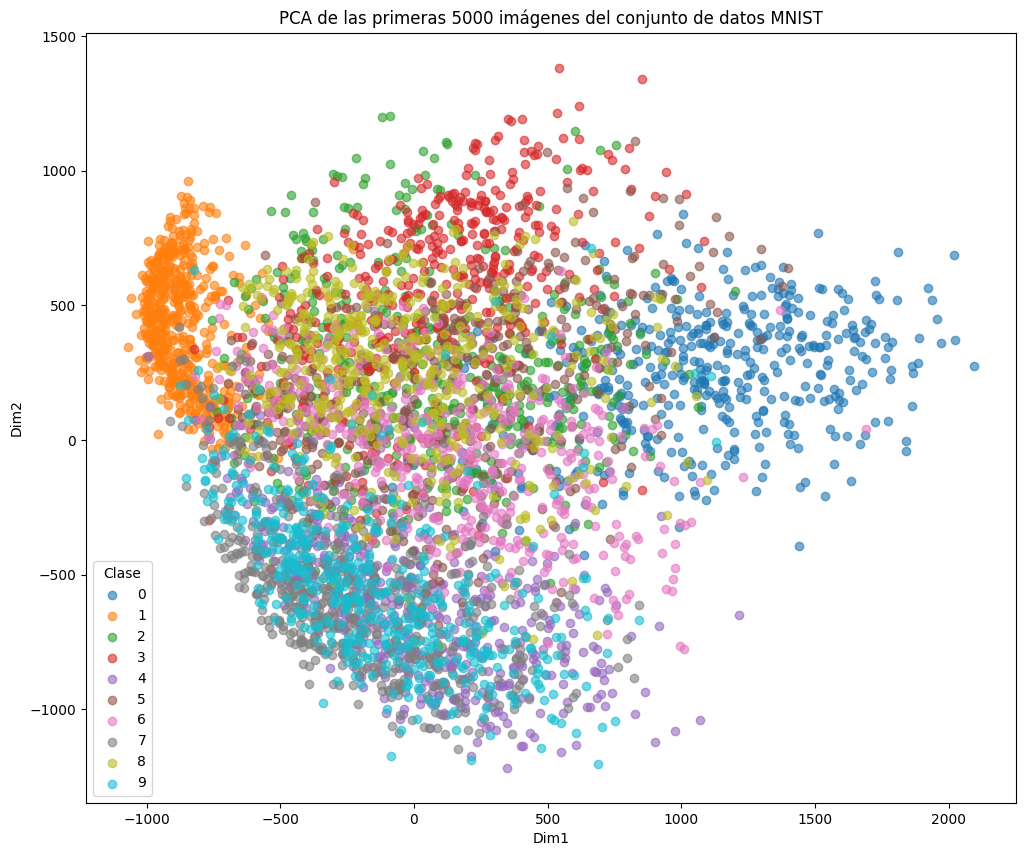

In [ ]:
# Visualización PCA
plt.figure(figsize=(12, 10))
for i in range(10):
    plt.scatter(df_pca.loc[df_pca['Etiqueta'] == str(i), 'Dim1'],
                df_pca.loc[df_pca['Etiqueta'] == str(i), 'Dim2'],
                label=str(i), alpha=0.6)
plt.legend(title="Clase")
plt.title("PCA de las primeras 5000 imágenes del conjunto de datos MNIST")
plt.xlabel("Dim1")
plt.ylabel("Dim2")
plt.show()

**CONCLUSIÓN:** Al aplicar t-SNE y PCA a las primeras 5.000 Imagenes, observo diferencias notables en la forma en la que cada algoritmo logra reducir las dimensiones y agrapar las clases,
en el **grafico de t-SNE**, observo grupos mucho más separados, cada digito de 0 a 9 forma un cluster distinto, los puntos estan más agrupados mostrando que son similares entre las imagenes de la misma clase, visualmente es más facil identificar diferencias,
en el **grafico de PCA**, no logro observar una definición clara de los grupos, parecen superpuestos entre las clases, al observar la primera y segunda componente capturan el 9.87% y 7.40% de la varianza, respectivamente, en general un 17.27%, a simple vista, pienso que es poco y podría buscarse una mayor captura o explicación de la varianza, se puede considerar un aumento de los componentes principales,

* 2 El clásico conjunto de datos de rostros `Olivetti` contiene 400 imágenes de rostros en escala de grises de 64 × 64 píxeles. Cada imagen se aplana a un vector unidimensional de tamaño 4096. Se fotografiaron 40 personas diferentes (10 veces cada una) y la tarea habitual es entrenar un modelo que pueda predecir qué persona está representada en cada imagen.

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
import pandas as pd
olivetti = fetch_olivetti_faces()
X=olivetti.data
y=olivetti.target

In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.388430,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.380165,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669421,0.673554,0.702479,...,0.194215,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.446281,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306


In [ ]:
# DataFrame con X
df = pd.DataFrame(X)

# Dimensiones de df
shape = df.shape
print(f"Shape del DataFrame: {shape}")

Shape del DataFrame: (400, 4096)


In [ ]:
# minimo y Maximo por Columna
df.describe().loc[["min", "max"], :]

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
min,0.086777,0.066116,0.090909,0.041322,0.107438,0.107438,0.115702,0.115702,0.119835,0.140496,...,0.049587,0.037190,0.053719,0.049587,0.033058,0.012397,0.049587,0.057851,0.061983,0.033058
max,0.805785,0.822314,0.871901,0.892562,0.871901,0.871901,0.871901,0.871901,0.871901,0.871901,...,0.793388,0.904959,0.888430,0.896694,0.826446,0.863636,0.921488,0.929752,0.884298,0.822314


In [ ]:
# Comprobar si hay valores mayores a 1 o menores a 0
values_greater_than_1 = (df > 1).any().any()
values_less_than_0 = (df < 0).any().any()

if values_greater_than_1:
    print("\nHay valores mayores a 1 en el DataFrame.")
else:
    print("\nNo hay valores mayores a 1 en el DataFrame.")

if values_less_than_0:
    print("\nHay valores menores a 0 en el DataFrame.")
else:
    print("\nNo hay valores menores a 0 en el DataFrame.")


No hay valores mayores a 1 en el DataFrame.

No hay valores menores a 0 en el DataFrame.


 * 2.1. Dado que el conjunto de datos es bastante pequeño, probablemente desee utilizar un muestreo estratificado para garantizar que haya la misma cantidad de imágenes por persona en cada conjunto. A continuación, para acelerar los algoritmos, probablemente debería reducir la dimensionalidad del conjunto de datos (por ejemplo, utilice PCA, preservando el 99 % de la varianza) y agrupe las imágenes utilizando `K-Means` y asegúrese de tener una buena cantidad de grupos (utilizando una de las técnicas discutidas en este capítulo). Visualice los grupos: ¿ve caras similares en cada grupo?

# **Muestreo Estratificado**

In [ ]:
%%time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

# Muestreo estratificado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Mostrar el número de muestras en cada conjunto
print(f"Número de muestras en X_train: {X_train.shape[0]}")
print(f"Número de muestras en X_test: {X_test.shape[0]}")
print(f"Número de muestras en y_train: {y_train.shape[0]}")
print(f"Número de muestras en y_test: {y_test.shape[0]}")
X_train.shape

Número de muestras en X_train: 280
Número de muestras en X_test: 120
Número de muestras en y_train: 280
Número de muestras en y_test: 120
CPU times: user 9.22 ms, sys: 117 µs, total: 9.34 ms
Wall time: 9.86 ms


(280, 4096)

**Codigo Profe**, Rotación Rostros, Aplico sobre la muestra

# **Reducción Dimensionalidad con PCA (80% Varianza)**

**Nota** Realice el ejercicio con 99% varianza acumluda para PCA, sin embargo al aplicar Silhouette me dan **235 Clusters** lo que implica que la mayoria de los clusters tengan **1 registro**, realizo pruebas para tener una cantidad de clusters mas ajustada según la cantidad de datos

**Probe con 90% de varianza acumulada 59 CP, Codo 70 clusters y Silhouette con 100 clusters, siguen siendo muchos clusters el 21% quedan con 1 registro**

**Probe con 80% de varianza acumulada 26 CP, Codo 50 clusters y Silhouette con 105 clusters**

**Me quedo con los 50 Clusters sugeridos por el metodo CODO, asi el 2% de los clusters pesentan 1 solo registro**

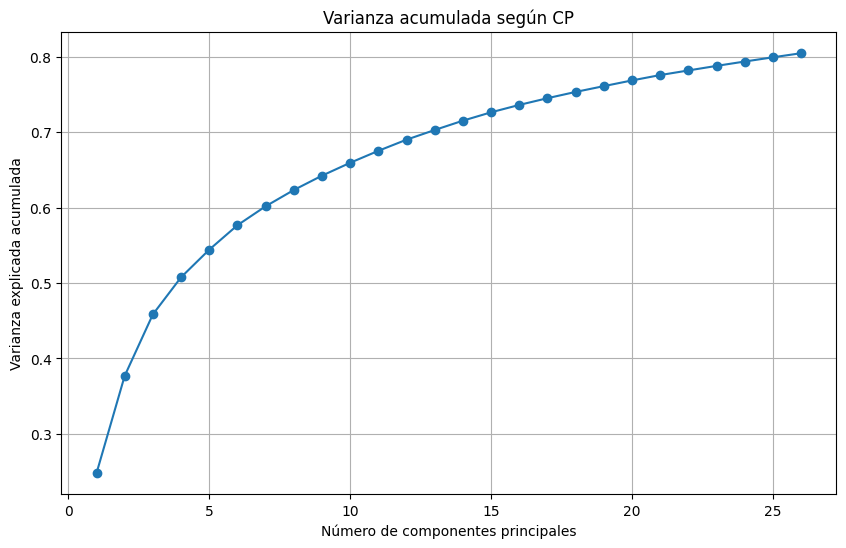

Dimensionalidad reducida a: 26 componentes principales
CPU times: user 603 ms, sys: 156 ms, total: 759 ms
Wall time: 787 ms


In [ ]:
%%time
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=0.80, whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Varianza explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Gráfico varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel("Número de componentes principales")
plt.ylabel("Varianza explicada acumulada")
plt.title("Varianza acumulada según CP")
plt.grid(True)
plt.show()

print(f"Dimensionalidad reducida a: {X_train_pca.shape[1]} componentes principales")

In [ ]:
# Tamaño de la data PCA
X_train_pca.shape

(280, 26)

# **Metodologías para escoger numero optimo de Cluster**

#**Metodo del Codo**
##### **1ra Prueba** probe con 100 grupos, sin embargo no permite establecer con facilidad el numero de clusters donde cortar,  
##### **2da Prueba** decidí iterar de 5 en 5 clusters hasta un maximo de 280, Aunque el corte me lo muestra en 165 visualmente no esta tan claro, pruebo con silhouette para tener un numero de clusters más claro
##### **3ra Prueba** esta prueba es con varianza acumulada de 90% en el PCA, me dan 70 clusters, pruebo tambien con Silhouette, para establecer un numero optimo
##### **4ta Prueba** esta prueba es con varianza acumulada de 80% en el PCA, me dan 50 clusters, pruebo tambien con Silhouette, para establecer un numero optimo, que reduzca la cantidad de clusters con 1 solo registro


Número óptimo de clusters según el método del codo: 50


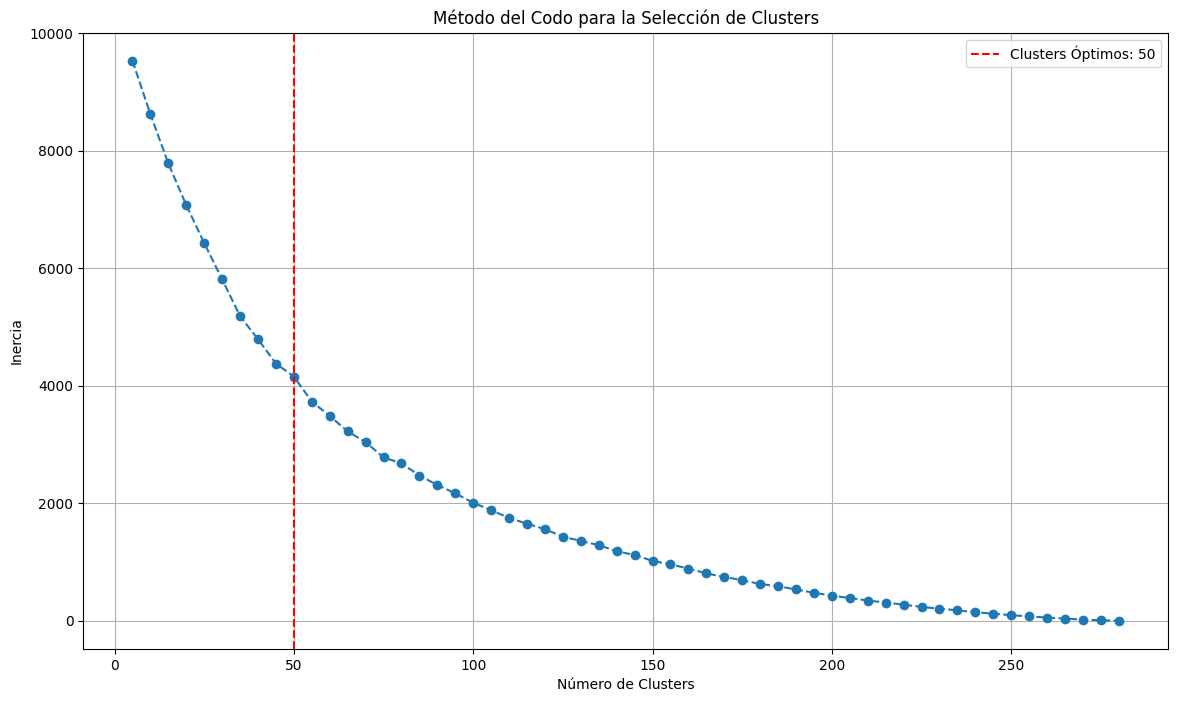

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Lista para almacenar los valores de inercia
inertia_values = []

# Prueba de 5 en 5 Clusters hasta 280
for k in range(5, 281, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    inertia_values.append(kmeans.inertia_)

# Numero optimo pata el metodo del codo
inertia_diff = np.diff(inertia_values)
inertia_diff2 = np.diff(inertia_diff)
optimal_clusters = range(5, 281, 5)[np.argmin(inertia_diff2) + 1]

print(f"Número óptimo de clusters según el método del codo: {optimal_clusters}")

# Gráfico del método del codo
plt.figure(figsize=(14, 8))
plt.plot(range(5, 281, 5), inertia_values, marker='o', linestyle='--')
plt.axvline(x=optimal_clusters, color='r', linestyle='--', label=f'Clusters Óptimos: {optimal_clusters}')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para la Selección de Clusters')
plt.legend()
plt.grid(True)
plt.show()

# **Silhouette**
##### **1ra Prueba** Itero de 5 en 5 clusters hasta maximo 279, y según el mayor score se establece un numero de corte optimo de **235 Clusters** sin embargo quedan la mayoria de los cluster con 1 registro,
##### **2da Prueba** Realizo PCA con varianza acumulada del 90% lo que genera **100 clusters** esto representa el 21% de los clusters con 1 registro
##### **3ra Prueba** Realizo PCA con varianza acumulada del 80% lo que genera **105 clusters**

Número óptimo de clusters según el método de Silhouette: 105


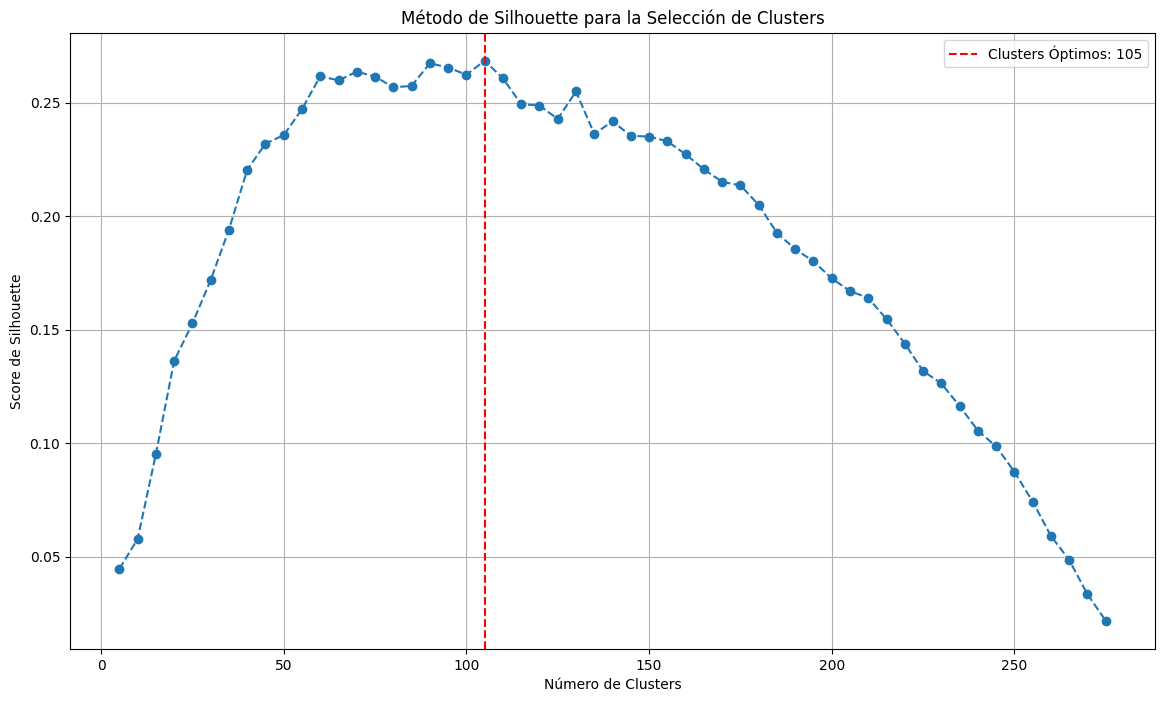

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Lista para almacenar los valores de silhouette
silhouette_scores = []

# Prueba de 5 en 5 Clusters hasta 280
for k in range(5, 280, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_train_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Numero optimo de clusters pata el metodo de silhouette
optimal_clusters = range(5, 280, 5)[silhouette_scores.index(max(silhouette_scores))]
print(f"Número óptimo de clusters según el método de Silhouette: {optimal_clusters}")

# Gráfico del método de silhouette
plt.figure(figsize=(14, 8))
plt.plot(range(5, 280, 5), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Score de Silhouette')
plt.title('Método de Silhouette para la Selección de Clusters')
plt.axvline(x=optimal_clusters, color='r', linestyle='--', label=f'Clusters Óptimos: {optimal_clusters}')
plt.legend()
plt.grid(True)
plt.show()

#**K-Means con 50 clusters**

In [ ]:
import plotly.express as px
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# K-Means con número óptimo de clusters
#optimal_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
optimal_kmeans = KMeans(n_clusters=50, random_state=42) # Uso numero de clusters sugerido por Metodo del Codo
optimal_kmeans.fit(X_train_pca)

# Etiquetas de clusters
clusters = optimal_kmeans.labels_

# Reducción a 3 componentes principales para visualización
pca_3d = PCA(n_components=3, whiten=True, random_state=42)
X_train_pca_3d = pca_3d.fit_transform(X_train_pca)

# Generación de colores para los clusters
label_colors = clusters.astype(str)

# Creación del gráfico 3D con Plotly
fig = px.scatter_3d(
    x=X_train_pca_3d[:, 0],
    y=X_train_pca_3d[:, 1],
    z=X_train_pca_3d[:, 2],
    color=label_colors,
    title='Visualización de Clusters en 3D',
    labels={'x': 'Componente Principal 1', 'y': 'Componente Principal 2', 'z': 'Componente Principal 3'},
    width=900,
    height=800
)

# Ajustar la posición de la leyenda a la derecha y reducir su tamaño
fig.update_layout(
    legend=dict(
        orientation="v",  # Orientación vertical para mostrar en columnas
        yanchor="middle",
        y=0.5,  # Posición vertical centrada
        xanchor="right",
        x=1.02,  # Ajuste a la derecha del gráfico
        title=None,
        font=dict(size=8)  # tamaño de la fuente de la leyenda
    )
)

fig.show()

# **Conteo de registros en cada cluster, de mayor a menor**

In [ ]:
import pandas as pd
from collections import Counter

# Conteo de registros por cluster
cluster_counts = Counter(clusters)

# DataFrame y ordenar por cantidad de registros (de mayor a menor)
cluster_counts_df = pd.DataFrame.from_dict(cluster_counts, orient='index', columns=['Cantidad de Registros'])
cluster_counts_df.index.name = 'Cluster'
cluster_counts_df = cluster_counts_df.sort_values(by='Cantidad de Registros', ascending=False)

# Serie con la cantidad de clusters por cada cantidad de registros (de 1 a 10)
num_clusters = cluster_counts_df['Cantidad de Registros'].value_counts().sort_index()

# Porcentaje que representa cada fila sobre el total de clusters
total_clusters = len(cluster_counts)
porcentaje_total = num_clusters / total_clusters * 100

# Listas con los clusters para cada cantidad de registros
clusters_por_cantidad = []
for cantidad in num_clusters.index:
    clusters_tabla = cluster_counts_df[cluster_counts_df['Cantidad de Registros'] == cantidad].index.tolist()
    clusters_por_cantidad.append(clusters_tabla)

# Tabla final
summary_table = pd.DataFrame({
    'Cantidad de Registros': num_clusters.index,
    'Número de Clusters': num_clusters.values,
    'Numero del Cluster': clusters_por_cantidad,
    '% sobre el Total de Clusters': porcentaje_total.values
})

# Ordenado por cantidad de registros
summary_table = summary_table.sort_values(by='Cantidad de Registros')

# Tabla final
print("Tabla de Resumen de Clusters por Cantidad de Registros:")
print(summary_table.to_string(index=False))

Tabla de Resumen de Clusters por Cantidad de Registros:
 Cantidad de Registros  Número de Clusters                           Numero del Cluster  % sobre el Total de Clusters
                     1                   1                                         [41]                           2.0
                     2                   5                         [44, 29, 18, 38, 45]                          10.0
                     3                   4                             [15, 31, 20, 32]                           8.0
                     4                  11 [17, 48, 27, 11, 47, 49, 28, 33, 19, 43, 40]                          22.0
                     5                   3                                  [30, 9, 46]                           6.0
                     6                   5                           [39, 42, 26, 3, 5]                          10.0
                     7                  11    [6, 21, 34, 14, 16, 24, 13, 22, 0, 2, 25]                          22.0


# **Pego los clusters a X_tarin**

In [ ]:
# Creo DataFrame con X_train + clusters
df_xtrain = pd.DataFrame(X_train)
df_xtrain['Cluster'] = clusters
df_xtrain

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,Cluster
0,0.586777,0.702479,0.731405,0.731405,0.743802,0.772727,0.793388,0.814050,0.822314,0.847107,...,0.520661,0.710744,0.623967,0.371901,0.400826,0.260331,0.198347,0.243802,0.256198,35
1,0.169421,0.264463,0.219008,0.280992,0.421488,0.549587,0.669421,0.702479,0.706612,0.731405,...,0.425620,0.438017,0.438017,0.454545,0.363636,0.198347,0.210744,0.235537,0.214876,22
2,0.256198,0.264463,0.260331,0.466942,0.727273,0.814050,0.822314,0.818182,0.822314,0.822314,...,0.219008,0.169421,0.111570,0.161157,0.264463,0.152893,0.090909,0.111570,0.115702,14
3,0.413223,0.487603,0.533058,0.574380,0.595041,0.615702,0.669421,0.698347,0.735537,0.768595,...,0.557851,0.537190,0.533058,0.508264,0.442149,0.293388,0.185950,0.123967,0.070248,37
4,0.454545,0.528926,0.644628,0.747934,0.780992,0.780992,0.801653,0.822314,0.826446,0.830579,...,0.074380,0.070248,0.086777,0.066116,0.078512,0.090909,0.111570,0.148760,0.169421,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.545455,0.566116,0.590909,0.628099,0.652893,0.636364,0.607438,0.590909,0.595041,0.599174,...,0.380165,0.384298,0.396694,0.396694,0.388430,0.227273,0.107438,0.111570,0.161157,22
276,0.392562,0.475207,0.661157,0.590909,0.471074,0.545455,0.673554,0.747934,0.801653,0.826446,...,0.111570,0.103306,0.115702,0.107438,0.119835,0.111570,0.115702,0.111570,0.119835,49
277,0.169421,0.293388,0.561983,0.677686,0.727273,0.756198,0.768595,0.785124,0.797521,0.805785,...,0.384298,0.388430,0.371901,0.363636,0.363636,0.359504,0.342975,0.363636,0.376033,4
278,0.578512,0.603306,0.632231,0.665289,0.677686,0.710744,0.723140,0.739669,0.739669,0.743802,...,0.177686,0.194215,0.198347,0.206612,0.194215,0.165289,0.177686,0.161157,0.152893,36


#**Visualizo manualmente cada persona en cada cluster**

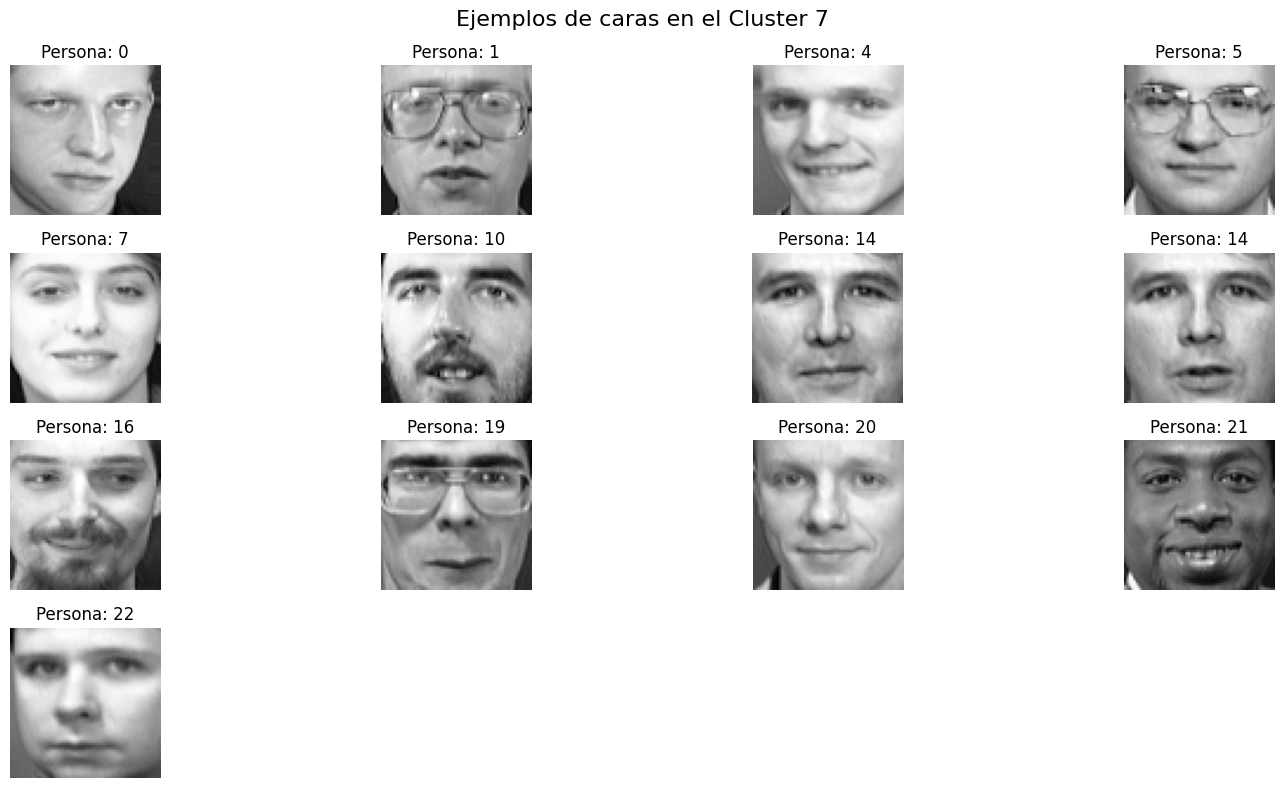

In [ ]:
import matplotlib.pyplot as plt

# Número de cluster a visualizar
cluster_to_visualize = 7

# índices de las muestras del cluster que quiero visualizar
indices_cluster = np.where(clusters == cluster_to_visualize)[0]

# Mostrar todas las imágenes del cluster a visualizar
num_images_to_show = len(indices_cluster)
plt.figure(figsize=(15, 8))
for i, persona_index in enumerate(indices_cluster):
    plt.subplot(4, num_images_to_show // 4 + 1, i + 1)
    plt.imshow(olivetti.data[persona_index].reshape((64,64)), cmap='gray')
    plt.title(f"Persona: {olivetti.target[persona_index]}")
    plt.axis('off')

plt.suptitle(f"Ejemplos de caras en el Cluster {cluster_to_visualize}", fontsize=16)
plt.tight_layout()
plt.show()

# **Metricas de similitud para evaluar homogeneidad en los clusters**
#### Ya que a simple vista no se puede establecer en su totalidad que las imagenes sean homogeneas en cada cluster, uso estas metricas para tener un valor más tecnico,

#### Aplico **Distancia Euclidiana:** entre más pequeño sea este valor mayor será la homogeneidad entre imagenes
#### **Varianza intra-cluster:** un valor bajo sugiere que las imagenes dentro del cluster son homogeneas

In [ ]:
import pandas as pd
from scipy.spatial.distance import euclidean

# DataFrame resultados
results = []

# clusters únicos
unique_clusters = np.unique(clusters)

# Iterar sobre cada cluster y calcular las métricas
for cluster in unique_clusters:
    indices_cluster = np.where(clusters == cluster)[0]
    num_registros = len(indices_cluster)

    if num_registros > 1:
        # Calcular la distancia euclidiana promedio entre todas las imágenes del cluster
        distances = []
        for i in range(len(indices_cluster)):
            for j in range(i + 1, len(indices_cluster)):
                dist = euclidean(olivetti.data[indices_cluster[i]], olivetti.data[indices_cluster[j]])
                distances.append(dist)

        average_distance = np.mean(distances)

        # Calcular la varianza intra-cluster
        intra_cluster_var = np.var(olivetti.data[indices_cluster], axis=0)
        average_intra_cluster_var = np.mean(intra_cluster_var)
    else:
        average_distance = 0
        average_intra_cluster_var = 0

    results.append({
        'Cluster': cluster,
        'Num Registros': num_registros,
        'Distancia Euclidiana Promedio': average_distance,
        'Varianza Intra-cluster Promedio': average_intra_cluster_var
    })

# resultados en un DataFrame
results_df = pd.DataFrame(results)

# Ordenar el DataFrame por el número de cluster
results_df = results_df.sort_values(by='Cluster')

# cantidad de registros por cluster
num_registros_df = pd.DataFrame([results_df['Num Registros'].values], columns=results_df['Cluster'].values, index=['Num Registros'])

# distancia euclidiana promedio y la varianza intra-cluster por cluster
metrics_df = pd.DataFrame([results_df['Distancia Euclidiana Promedio'].values, results_df['Varianza Intra-cluster Promedio'].values],
                          columns=results_df['Cluster'].values,
                          index=['Distancia Euclidiana Promedio', 'Varianza Intra-cluster Promedio'])

# Print de tablas
print("Tabla 1: Cantidad de registros por cluster")
print(num_registros_df)
print("\nTabla 2: Distancia euclidiana y varianza intra-cluster por cluster")
metrics_df

Tabla 1: Cantidad de registros por cluster
               0   1   2   3   4   5   6   7   8   9   ...  40  41  42  43  \
Num Registros   7   8   7   6  10   6   7  13   9   5  ...   4   1   6   4   

               44  45  46  47  48  49  
Num Registros   2   2   5   4   4   4  

[1 rows x 50 columns]

Tabla 2: Distancia euclidiana y varianza intra-cluster por cluster


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Distancia Euclidiana Promedio,12.448561,11.586865,11.606276,10.343137,11.898788,10.610505,11.903333,12.145861,12.513950,11.742829,...,11.864468,0.0,11.545455,10.575147,16.065905,9.883676,10.387560,14.982145,11.081088,12.050635
Varianza Intra-cluster Promedio,0.016887,0.014551,0.014507,0.011053,0.016696,0.011738,0.015334,0.017537,0.017882,0.013591,...,0.013882,0.0,0.014051,0.010495,0.015754,0.005962,0.010641,0.020953,0.011300,0.013663


In [ ]:
# Calcular los promedios de todos los clusters
promedios = metrics_df.mean(axis=1)
print("\nPromedio de Distancia Euclidiana Promedio y Varianza Intra-cluster Promedio:")
print(promedios)


Promedio de Distancia Euclidiana Promedio y Varianza Intra-cluster Promedio:
Distancia Euclidiana Promedio      11.638201
Varianza Intra-cluster Promedio     0.013726
dtype: float64


**Respuesta** a nivel general
#### La distancia euclidiana promedio de 11.63 sugiere que aunque las imágenes dentro de cada cluster pueden tener variaciones, todavía mantienen una cierta cohesión visual.
#### La varianza intra-cluster promedio de 0.013 indica que las imágenes son bastante consistentes en términos de sus características visuales, lo que refuerza la idea de que hay homogeneidad en los cluster.

* 2.2. Entrene un `modelo de mezcla gaussiana` en el conjunto de datos de rostros de Olivetti. Use el modelo para generar algunos rostros nuevos (usando el método sample()) y visualícelos (si utilizó PCA, deberá
usar su método inverse_transform()). Intente modificar algunas
imágenes (por ejemplo, rotarlas, voltearlas, oscurecerlas) y vea si el modelo puede detectar
las anomalías (es decir, compare el resultado del método score_samples() para imágenes normales y anomalías).

# **Cargue de datos Olivetti**

In [45]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
from sklearn.model_selection import train_test_split

# Conjunto de datos de rostros de Olivetti
olivetti = fetch_olivetti_faces()
X=olivetti.data
y=olivetti.target

print(X.shape)
print(y.shape)

# Muestreo estratificado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Mostrar el número de muestras en cada conjunto
print(f"Número de muestras en X_train: {X_train.shape[0]}")
print(f"Número de muestras en X_test: {X_test.shape[0]}")
print(f"Número de muestras en y_train: {y_train.shape[0]}")
print(f"Número de muestras en y_test: {y_test.shape[0]}")
X_train.shape

(400, 4096)
(400,)
Número de muestras en X_train: 280
Número de muestras en X_test: 120
Número de muestras en y_train: 280
Número de muestras en y_test: 120


(280, 4096)

# **Numero de Componentes PCA**

Intente generar n_components con **BIC**, pero el proceso se corta ya que no hay suficiente memoria,
**Uso los 59 componentes que encontre con la varianza acumulada del 90%**

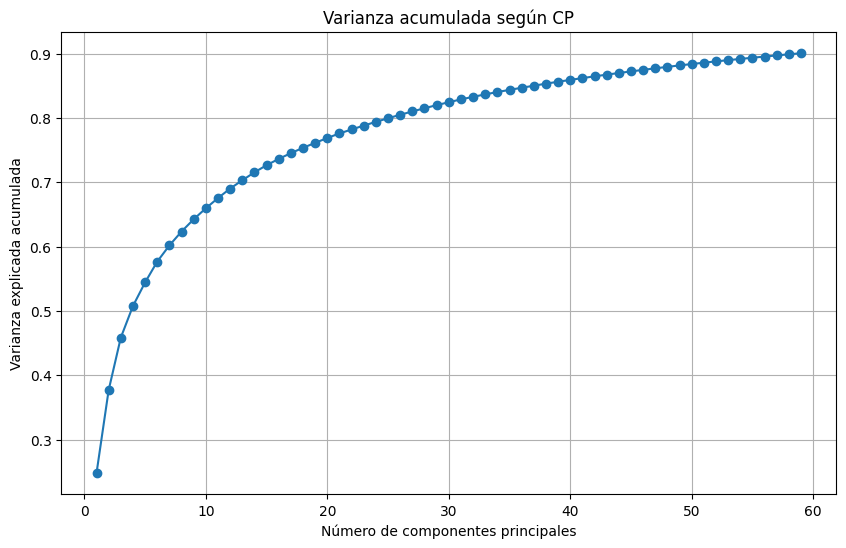

Dimensionalidad reducida a: 59 componentes principales
CPU times: user 567 ms, sys: 180 ms, total: 747 ms
Wall time: 443 ms


In [46]:
%%time
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=0.90, whiten=True, random_state=42)
X_train_pca_1 = pca.fit_transform(X_train)
X_test_pca_1 = pca.transform(X_test)

# Varianza explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Gráfico varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel("Número de componentes principales")
plt.ylabel("Varianza explicada acumulada")
plt.title("Varianza acumulada según CP")
plt.grid(True)
plt.show()

print(f"Dimensionalidad reducida a: {X_train_pca_1.shape[1]} componentes principales")

# **Entreno el Modelo GMM**

In [47]:
from sklearn.mixture import GaussianMixture

# Entrenar un modelo de mezcla gaussiana (GMM)
n_components = 59  # Número de componentes
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X_train_pca_1)

GaussianMixture(n_components=59, random_state=42)

# **Generar Nuevos rostros**
#### Como fue necesario usar PCA debo usar inverse_transform()

In [48]:
# Generar nuevos rostros usando el modelo GMM
n_samples = 10  # Número de muestras a generar
generated_faces_pca_1 = gmm.sample(n_samples)[0]

# con PCA, se usa inverse_transform()
generated_faces_1 = pca.inverse_transform(generated_faces_pca_1)
generated_faces_1

array([[ 0.55476167,  0.596095  ,  0.62093178, ...,  0.1185197 ,
         0.12941387,  0.14489117],
       [ 0.48743305,  0.49369789,  0.50321457, ...,  0.58261688,
         0.57596949,  0.55099147],
       [ 0.65894119,  0.72364439,  0.76425553, ...,  0.37908909,
         0.49741107,  0.61712031],
       ...,
       [ 0.56737501,  0.64541821,  0.72814885, ..., -0.06645001,
        -0.0341825 ,  0.03854777],
       [ 0.26129698,  0.2777221 ,  0.34206894, ...,  0.71860762,
         0.67656463,  0.59543622],
       [ 0.32650332,  0.2915993 ,  0.35297251, ...,  0.34606796,
         0.41927249,  0.42498843]])

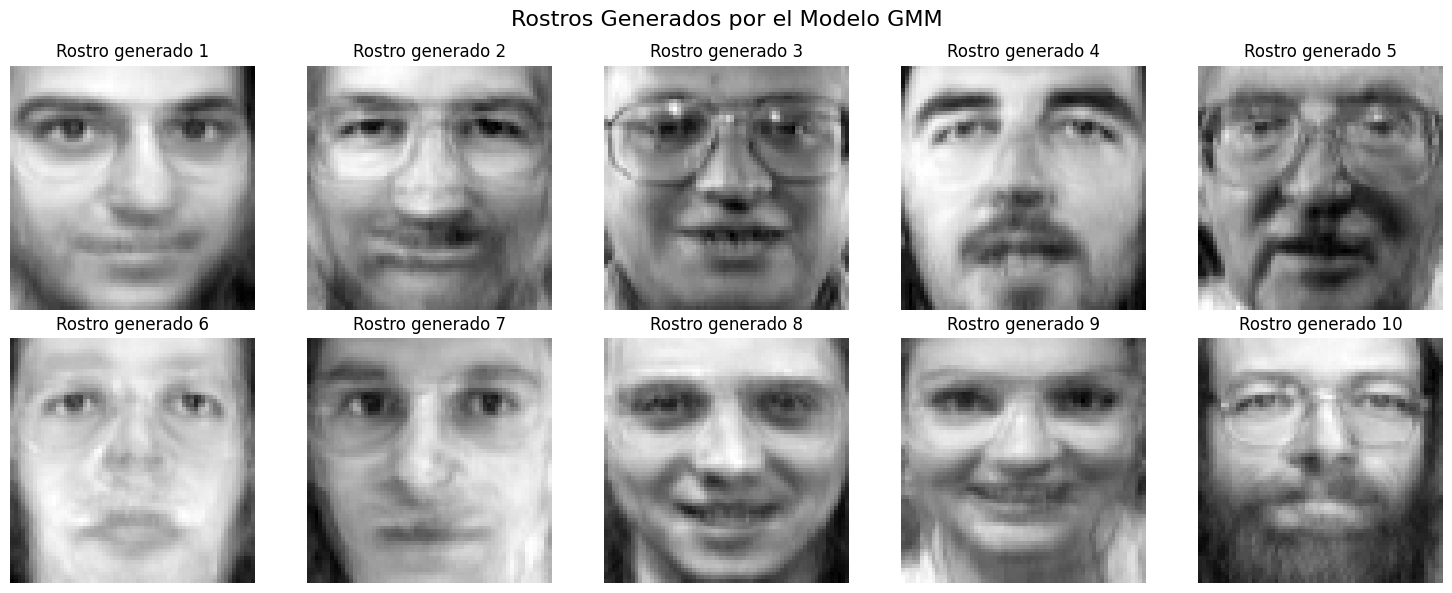

In [49]:
# Visualizar los rostros generados
plt.figure(figsize=(15, 6))
for i in range(n_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(generated_faces_1[i].reshape((64, 64)), cmap='gray')
    plt.title(f"Rostro generado {i + 1}")
    plt.axis('off')

plt.suptitle("Rostros Generados por el Modelo GMM", fontsize=16)
plt.tight_layout()
plt.show()

# **Modifico imagenes y calculo anomalias**

# **Se Verifican y se Visualizan las imagenes Rotadas, Volteadas, oscurecidas**

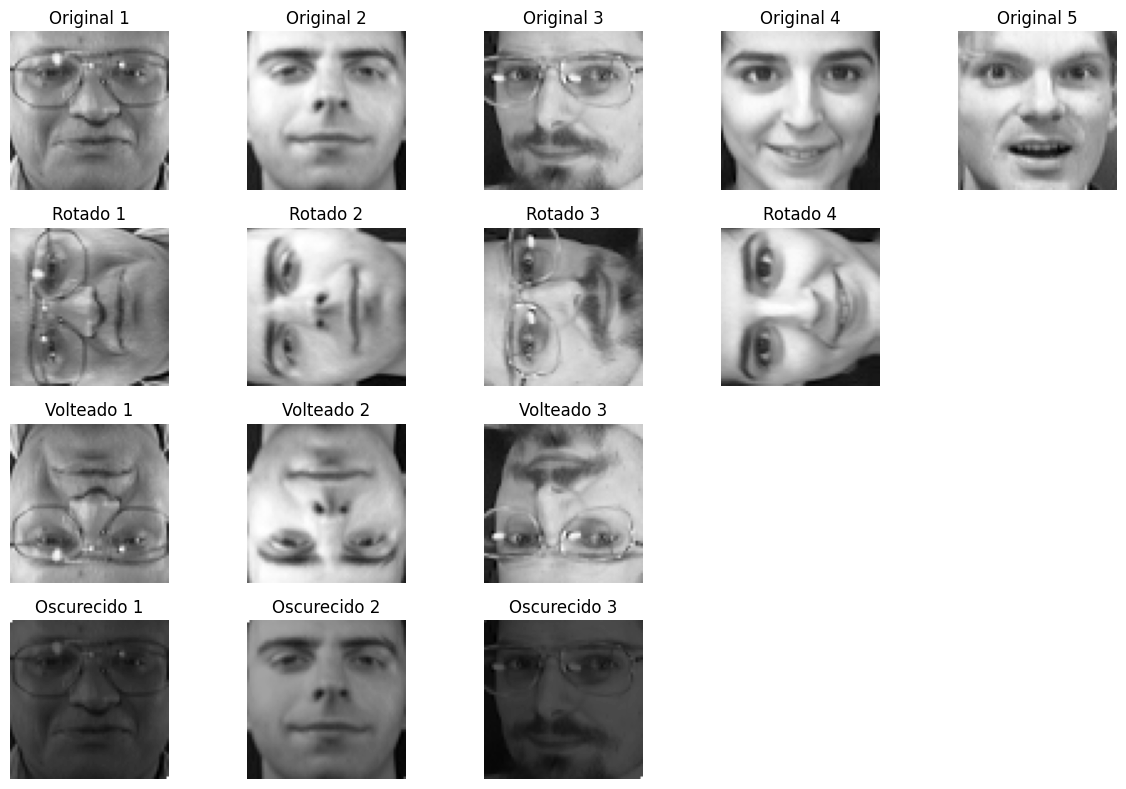

In [50]:
from scipy.ndimage import rotate
from skimage.util import random_noise
import matplotlib.pyplot as plt

# Ejemplo de modificación de imágenes (Profe)
def modify_images(images):
    n_rotated = 4
    rotated = np.transpose(images[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
    rotated = rotated.reshape(-1, 64*64)

    n_flipped = 3
    flipped = images[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
    flipped = flipped.reshape(-1, 64*64)

    n_darkened = 3
    darkened = images[:n_darkened].copy()
    darkened[:, 1:-1] *= 0.3

    return rotated, flipped, darkened

# Obtener imágenes originales del conjunto de datos de prueba
original_images = X_test[:5]

# Modificar las imágenes originales
rotated_images, flipped_images, darkened_images = modify_images(original_images)

# Visualización de las imágenes originales y modificadas antes de PCA
plt.figure(figsize=(12, 8))
n_images = len(original_images)
for i in range(n_images):
    plt.subplot(4, n_images, i + 1)
    plt.imshow(original_images[i].reshape((64, 64)), cmap='gray')
    plt.title(f"Original {i + 1}")
    plt.axis('off')

    if i < len(rotated_images):
        plt.subplot(4, n_images, i + n_images + 1)
        plt.imshow(rotated_images[i].reshape((64, 64)), cmap='gray')
        plt.title(f"Rotado {i + 1}")
        plt.axis('off')

    if i < len(flipped_images):
        plt.subplot(4, n_images, i + 2 * n_images + 1)
        plt.imshow(flipped_images[i].reshape((64, 64)), cmap='gray')
        plt.title(f"Volteado {i + 1}")
        plt.axis('off')

    if i < len(darkened_images):
        plt.subplot(4, n_images, i + 3 * n_images + 1)
        plt.imshow(darkened_images[i].reshape((64, 64)), cmap='gray')
        plt.title(f"Oscurecido {i + 1}")
        plt.axis('off')

plt.tight_layout()
plt.show()

# **Comparación Score Anomalias**

In [51]:
# Transformar imágenes modificadas con PCA
rotated_transformed = pca.transform(rotated_images)
flipped_transformed = pca.transform(flipped_images)
darkened_transformed = pca.transform(darkened_images)

# Calcular puntuaciones de anomalías con GMM en imágenes originales y modificadas
scores_original = gmm.score_samples(X_test_pca_1[:5])
scores_rotated = gmm.score_samples(rotated_transformed)
scores_flipped = gmm.score_samples(flipped_transformed)
scores_darkened = gmm.score_samples(darkened_transformed)

# Mostrar resultados
print("Scores de Anomalías:")
print(f"Imágenes Originales: {scores_original}")
print(f"Imágenes Modificadas (Rotadas): {scores_rotated}")
print(f"Imágenes Modificadas (Volteadas): {scores_flipped}")
print(f"Imágenes Modificadas (Oscurecidas): {scores_darkened}")

Scores de Anomalías:
Imágenes Originales: [-1955862.51707337 -6819967.89164474 -5108071.99610866 -7545908.35006377
 -8647057.12153119]
Imágenes Modificadas (Rotadas): [-23149692.38097493 -41370692.79615685 -54577005.15532383
 -59676276.77602844]
Imágenes Modificadas (Volteadas): [-31298952.4087549  -47562439.91319981 -44974445.3074085 ]
Imágenes Modificadas (Oscurecidas): [-23510684.61588831 -18862219.12598823 -20484796.47304777]


# **Grafico detección de anomalias**

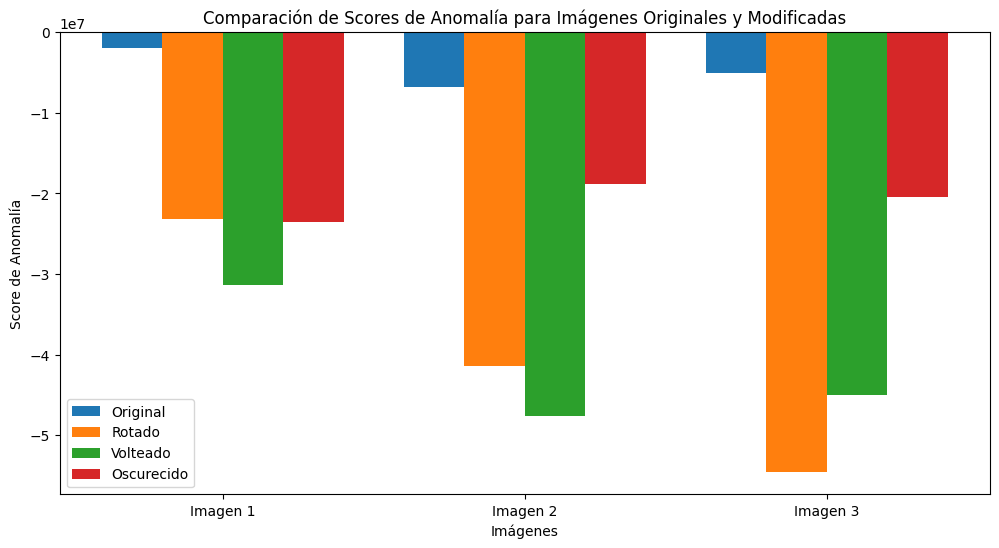

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Ajustar todas las listas de scores a la misma longitud
min_length = min(len(scores_original), len(scores_rotated), len(scores_flipped), len(scores_darkened))

scores_original = scores_original[:min_length]
scores_rotated = scores_rotated[:min_length]
scores_flipped = scores_flipped[:min_length]
scores_darkened = scores_darkened[:min_length]

# Crear etiquetas para las imágenes
labels = [f'Imagen {i + 1}' for i in range(min_length)]

# Agrupar los scores para el gráfico
scores = [
    scores_original.tolist(),
    scores_rotated.tolist(),
    scores_flipped.tolist(),
    scores_darkened.tolist()
]

x = np.arange(len(labels))  # Posiciones en el eje x
width = 0.2  # Ancho de las barras

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - 1.5*width, scores[0], width, label='Original')
ax.bar(x - 0.5*width, scores[1], width, label='Rotado')
ax.bar(x + 0.5*width, scores[2], width, label='Volteado')
ax.bar(x + 1.5*width, scores[3], width, label='Oscurecido')

# Añadir etiquetas y título
ax.set_xlabel('Imágenes')
ax.set_ylabel('Score de Anomalía')
ax.set_title('Comparación de Scores de Anomalía para Imágenes Originales y Modificadas')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Mostrar el gráfico
plt.show()

# **Interpretación de los score de anomalias**

In [53]:
# Interpretación de los scores
print("\nInterpretación de los Scores de Anomalía:")
for i in range(min_length):
    print(f"\nImagen {i + 1}:")
    print(f"  Score Original: {scores_original[i]}")
    print(f"  Score Rotado: {scores_rotated[i]}")
    print(f"  Score Volteado: {scores_flipped[i]}")
    print(f"  Score Oscurecido: {scores_darkened[i]}")

    if scores_rotated[i] > scores_original[i]:
        print("  - La imagen rotada tiene un score de anomalía mayor, indicando que el modelo detecta esta modificación como una anomalía.")
    else:
        print("  - La imagen rotada tiene un score de anomalía menor o igual, indicando que el modelo no detecta esta modificación como una anomalía.")

    if scores_flipped[i] > scores_original[i]:
        print("  - La imagen volteada tiene un score de anomalía mayor, indicando que el modelo detecta esta modificación como una anomalía.")
    else:
        print("  - La imagen volteada tiene un score de anomalía menor o igual, indicando que el modelo no detecta esta modificación como una anomalía.")

    if scores_darkened[i] > scores_original[i]:
        print("  - La imagen oscurecida tiene un score de anomalía mayor, indicando que el modelo detecta esta modificación como una anomalía.")
    else:
        print("  - La imagen oscurecida tiene un score de anomalía menor o igual, indicando que el modelo no detecta esta modificación como una anomalía.")


Interpretación de los Scores de Anomalía:

Imagen 1:
  Score Original: -1955862.5170733703
  Score Rotado: -23149692.380974926
  Score Volteado: -31298952.408754904
  Score Oscurecido: -23510684.615888312
  - La imagen rotada tiene un score de anomalía menor o igual, indicando que el modelo no detecta esta modificación como una anomalía.
  - La imagen volteada tiene un score de anomalía menor o igual, indicando que el modelo no detecta esta modificación como una anomalía.
  - La imagen oscurecida tiene un score de anomalía menor o igual, indicando que el modelo no detecta esta modificación como una anomalía.

Imagen 2:
  Score Original: -6819967.891644744
  Score Rotado: -41370692.79615685
  Score Volteado: -47562439.91319981
  Score Oscurecido: -18862219.125988226
  - La imagen rotada tiene un score de anomalía menor o igual, indicando que el modelo no detecta esta modificación como una anomalía.
  - La imagen volteada tiene un score de anomalía menor o igual, indicando que el modelo

* 2.3. Algunas técnicas de reducción de dimensionalidad también se pueden utilizar para la detección de anomalías. Por ejemplo, tome el conjunto de datos de rostros de Olivetti y redúzcalo con PCA, preservando el 99 % de la varianza. A continuación, tome algunas de las imágenes modificadas que creó en el ejercicio anterior y observe su error de reconstrucción: observe cuánto mayor es el error de reconstrucción. Si traza una imagen reconstruida, verá por qué: intenta reconstruir un rostro normal.

#**Cargue de Datos Olivetti**

In [56]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
from sklearn.model_selection import train_test_split

# Conjunto de datos de rostros de Olivetti
olivetti = fetch_olivetti_faces()
X=olivetti.data
y=olivetti.target

print(X.shape)
print(y.shape)

# Muestreo estratificado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Mostrar el número de muestras en cada conjunto
print(f"Número de muestras en X_train: {X_train.shape[0]}")
print(f"Número de muestras en X_test: {X_test.shape[0]}")
print(f"Número de muestras en y_train: {y_train.shape[0]}")
print(f"Número de muestras en y_test: {y_test.shape[0]}")
X_train.shape

(400, 4096)
(400,)
Número de muestras en X_train: 280
Número de muestras en X_test: 120
Número de muestras en y_train: 280
Número de muestras en y_test: 120


(280, 4096)

# **PCA con el 99% Varianza Acumulada**

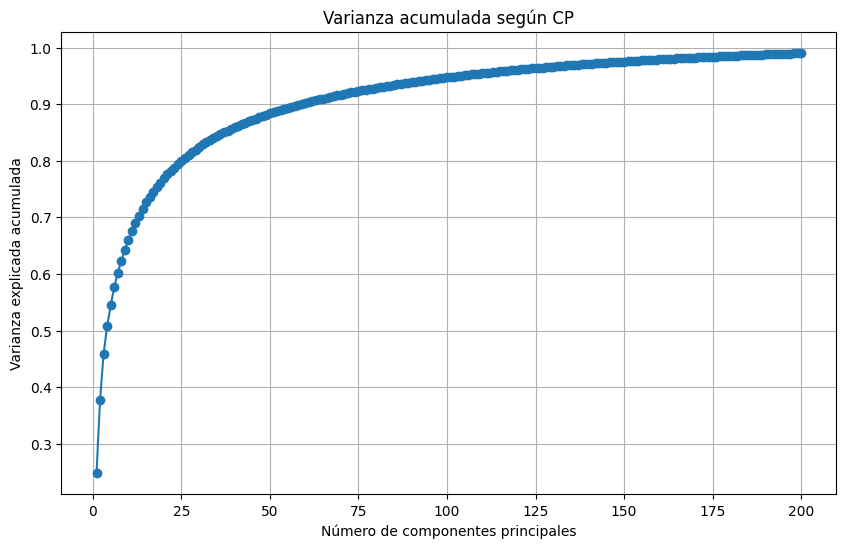

Dimensionalidad reducida a: 200 componentes principales
CPU times: user 599 ms, sys: 242 ms, total: 841 ms
Wall time: 491 ms


In [57]:
%%time
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=0.99, whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Varianza explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Gráfico varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel("Número de componentes principales")
plt.ylabel("Varianza explicada acumulada")
plt.title("Varianza acumulada según CP")
plt.grid(True)
plt.show()

print(f"Dimensionalidad reducida a: {X_train_pca.shape[1]} componentes principales")

# **Entrenamiento el Modelo GMM** con 200 CP

In [58]:
from sklearn.mixture import GaussianMixture

# Entrenar un modelo de mezcla gaussiana (GMM)
n_components = 200  # Número de componentes con el 99% Varianza Acumulada
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X_train_pca)

GaussianMixture(n_components=200, random_state=42)

# **Error de reconstrucción**

Errores de reconstrucción:
Errores de las imágenes rotadas: [0.00764083 0.00831295 0.00713257 0.00940301]
Errores de las imágenes volteadas: [0.00721072 0.0065281  0.00911906]
Errores de las imágenes oscurecidas: [0.00091167 0.00084877 0.00106831]


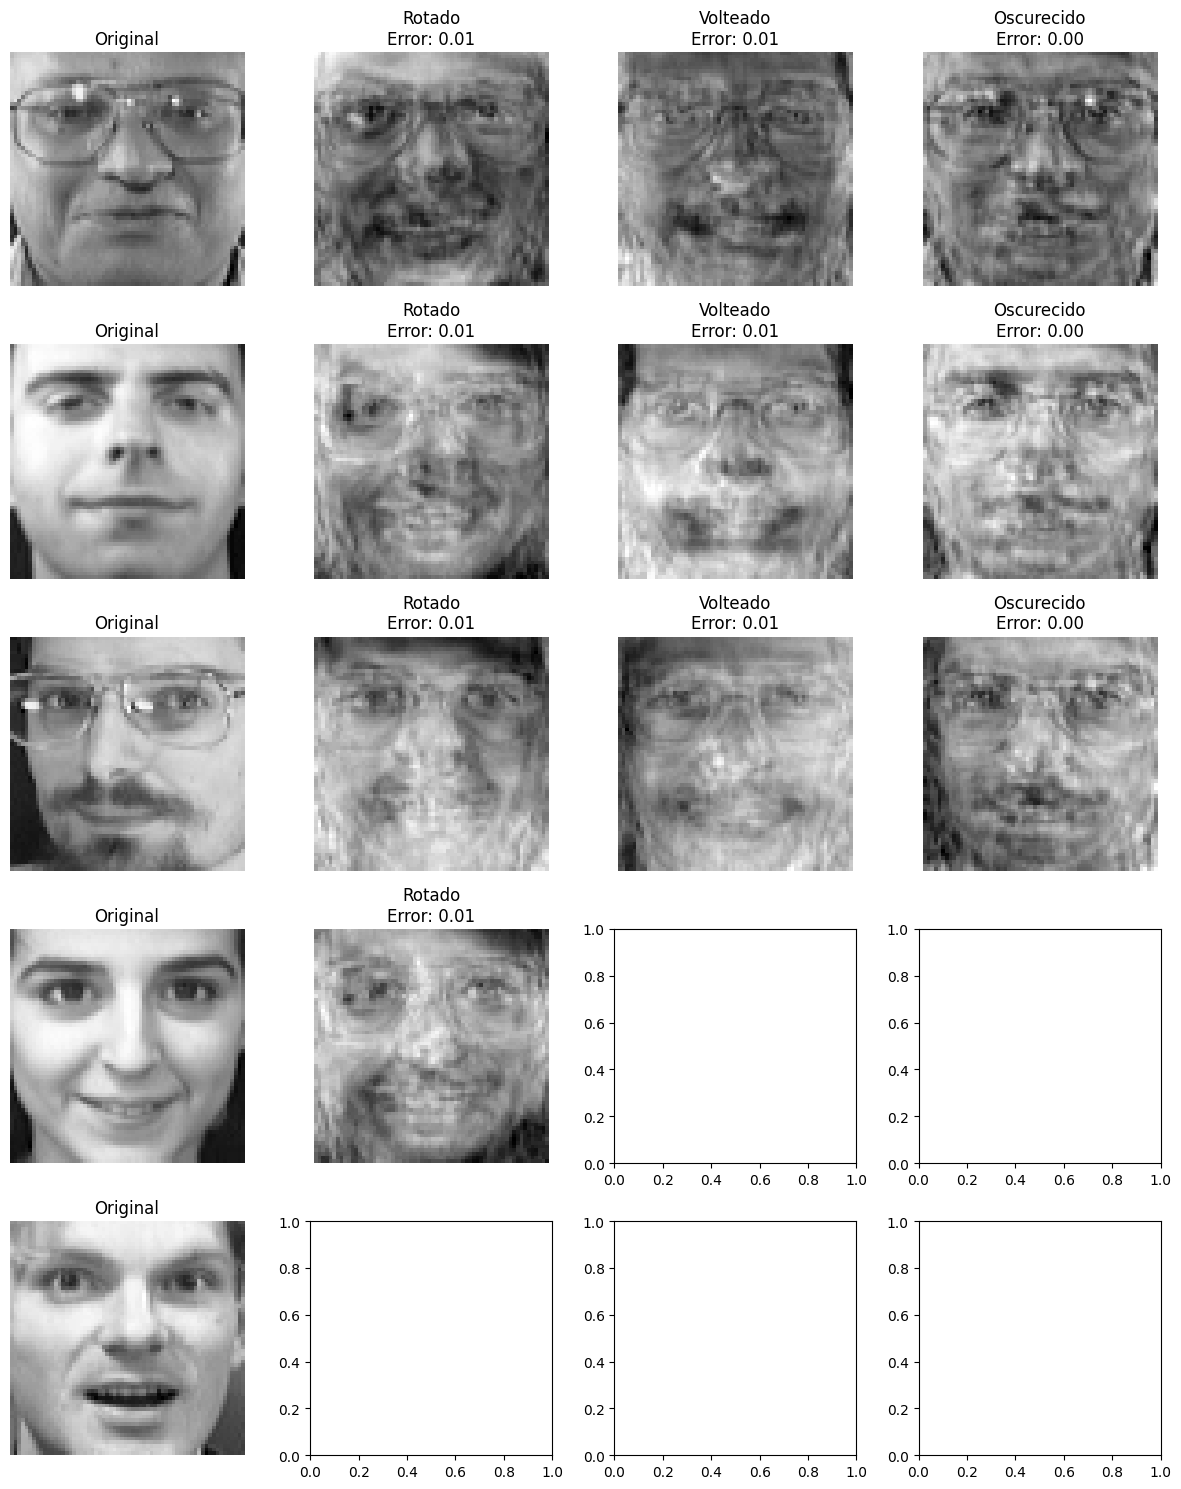

In [59]:
# Transformar las imágenes modificadas utilizando PCA
rotated_transformed = pca.transform(rotated_images)
flipped_transformed = pca.transform(flipped_images)
darkened_transformed = pca.transform(darkened_images)

# Reconstruir las imágenes a partir de las componentes principales
rotated_reconstructed = pca.inverse_transform(rotated_transformed)
flipped_reconstructed = pca.inverse_transform(flipped_transformed)
darkened_reconstructed = pca.inverse_transform(darkened_transformed)

# Calcular el error de reconstrucción (MSE) para cada tipo de modificación
rotated_error = np.mean((rotated_images - rotated_reconstructed) ** 2, axis=1)
flipped_error = np.mean((flipped_images - flipped_reconstructed) ** 2, axis=1)
darkened_error = np.mean((darkened_images - darkened_reconstructed) ** 2, axis=1)

# Mostrar los errores de reconstrucción
print("Errores de reconstrucción:")
print(f"Errores de las imágenes rotadas: {rotated_error}")
print(f"Errores de las imágenes volteadas: {flipped_error}")
print(f"Errores de las imágenes oscurecidas: {darkened_error}")

# Visualizar las imágenes originales, modificadas y reconstruidas
fig, axes = plt.subplots(5, 4, figsize=(12, 15))

for i in range(n_images):
    # Imagen original
    axes[i, 0].imshow(original_images[i].reshape((64, 64)), cmap='gray')
    axes[i, 0].set_title("Original")
    axes[i, 0].axis('off')

    # Imagen rotada reconstruida
    if i < len(rotated_reconstructed):
        axes[i, 1].imshow(rotated_reconstructed[i].reshape((64, 64)), cmap='gray')
        axes[i, 1].set_title(f"Rotado\nError: {rotated_error[i]:.2f}")
        axes[i, 1].axis('off')

    # Imagen volteada reconstruida
    if i < len(flipped_reconstructed):
        axes[i, 2].imshow(flipped_reconstructed[i].reshape((64, 64)), cmap='gray')
        axes[i, 2].set_title(f"Volteado\nError: {flipped_error[i]:.2f}")
        axes[i, 2].axis('off')

    # Imagen oscurecida reconstruida
    if i < len(darkened_reconstructed):
        axes[i, 3].imshow(darkened_reconstructed[i].reshape((64, 64)), cmap='gray')
        axes[i, 3].set_title(f"Oscurecido\nError: {darkened_error[i]:.2f}")
        axes[i, 3].axis('off')

plt.tight_layout()
plt.show()

# **RESPUESTA**
#### Los errores de reconstrucción para las **imágenes rotadas** son relativamente altos, lo que puede sugerir que las imágenes rotadas se desvían significativamente de las imágenes originales según el modelo PCA, la rotación es una modificación detectada como una anomalía por el modelo.

#### Los errores de reconstrucción para las **imágenes volteadas** son similares a los de las imágenes rotadas. lo que puede indicar que el volteo también es una modificación que se considera una anomalía, ya que el modelo PCA tiene dificultades para reconstruir estas imágenes de manera precisa.

#### Los errores de reconstrucción para las imágenes oscurecidas son significativamente menores que los de las imágenes rotadas y volteadas. Esto sugiere que oscurecer las imágenes no causa una desviación significativa de las imágenes originales según el modelo PCA. En otras palabras, el modelo PCA es capaz de reconstruir las imágenes oscurecidas de manera más precisa y no las considera como anomalías destacadas.